## 5.1 注意力机制介绍

### 心理学

* 动物需要在复杂环境下有效关注值得注意的点
* 心理学框架：
  * 人类根据随意线索和不随意线索选择注意点
  * 随意意思是**跟着思考**

### 注意力机制

* 卷积、全连接、池化层都只考虑不随意线索
* 注意力机制则显示的考虑随意线索
  * 随意线索被称之为查询(query)
    * 想要干什么，如想要喝咖啡
  * 每个输入是一个值(value) 和不随意线索(key) 的对
    * key是存在的物体，value可以和key一样，或者有一点变化
  * 通过注意力池化层来**有偏向性**的选择选择某些输入，如下图所示:

![](https://zh-v2.d2l.ai/_images/qkv.svg)

### 非参注意力池化层

* 给定数据$(x_i,y_i),i=1,...,n$
* 平均池化是最简单的方案:$f(x)=\frac{1}{n} \sum_{i} y_{i}$
* 更好的方案是60年代提出来的Nadaraya-Watson核回归,其实就是K-Means

$$
f(x)=\sum_{i=1}^{n} \frac{K\left(x-x_{i}\right)}{\sum_{j=1}^{n} K\left(x-x_{j}\right)} y_{i}
$$

选择高斯核函数：
$$
\begin{aligned}
f(x) &=\sum_{i=1}^{n} \frac{\exp \left(-\frac{1}{2}\left(x-x_{i}\right)^{2}\right)}{\sum_{j=1}^{n} \exp \left(-\frac{1}{2}\left(x-x_{j}\right)^{2}\right)} y_{i} \\
&=\sum_{i=1}^{n} \operatorname{softmax}\left(-\frac{1}{2}\left(x-x_{i}\right)^{2}\right) y_{i}
\end{aligned}
$$




### 参数化注意力机制

引入可学习参数$w$
$$
f(x)=\sum_{i=1}^{n} \operatorname{softmax}\left(-\frac{1}{2}\left(\left(x-x_{i}\right) w\right)^{2}\right) y_{i}
$$


### 注意力机制可视化

In [1]:
import torch
from d2l import torch as d2l

画出展现注意力权重的热力图函数`show_heatmaps` 。其输入matrices的形状是 （要显示的行数，要显示的列数，查询的数目，键的数目）。

In [23]:
def show_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(2.5, 2.5), cmap='Reds'):
    """
    显示矩阵热力图
    :param matrices: (要显示的行数，要显示的列数，查询的数目，键的数目)
    :param xlabel:
    :param ylabel:
    :param titles:
    :param figise:
    :param cmap:
    :return:
    """
    d2l.use_svg_display()
    num_rows, num_cols = matrices.shape[0], matrices.shape[1]
    fig, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize, sharex=True, sharey=True, squeeze=False)
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)):
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            pcm = ax.imshow(matrix.detach().numpy(), cmap=cmap)
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)
            if j == 0:
                ax.set_ylabel(ylabel)
            if titles:
                ax.set_title(titles[j])
    fig.colorbar(pcm, ax=axes, shrink=0.6);

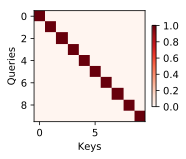

In [24]:
attention_weights = torch.eye(10).reshape((1, 1, 10, 10))
show_heatmaps(attention_weights, xlabel='Keys', ylabel='Queries')

### 总结

一般可以写为
$$
f(x)=\sum_{i} \alpha(x,x_i)y_i
$$
$Key$就是环境中每个$x_i$。